In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from sklearn import datasets


In [3]:
iris = datasets.load_iris()

In [6]:
iris.data.shape

(150, 4)

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [10]:
x = scale(iris.data)

In [12]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
clustering = KMeans(n_clusters = 3, random_state=1)

In [14]:
clustering.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [15]:
clustering.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [16]:
%matplotlib inline

In [17]:
iris_df = pd.DataFrame(iris.data)

In [18]:
iris_df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [19]:
iris_df.columns = ['sepal_length','sepal_width', 'petal_length','petal_width']

In [20]:
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [23]:
y = pd.DataFrame(iris.target)
y.columns = ['targets']

In [24]:
y.head()

,targets
0,0
1,0
2,0
3,0
4,0


Text(0.5,1,'This actual data set ')

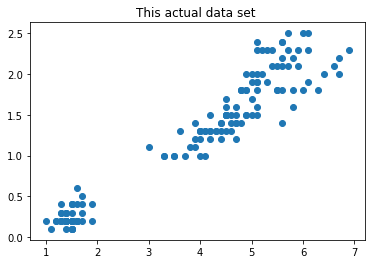

In [25]:
plt.scatter(x=iris_df.petal_length, y = iris_df.petal_width)
plt.title ("This actual data set ")

In [32]:
import numpy as np
color = np.array(['red','blue','green'])

In [33]:
color[0]

'red'

Text(0.5,1,'This actual data set ')

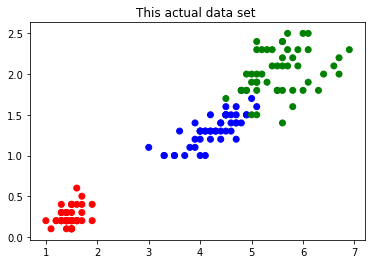

In [34]:
plt.scatter(x=iris_df.petal_length, y = iris_df.petal_width, c= color[iris.target])
plt.title ("This actual data set ")

Text(0.5,1,'This actual data set ')

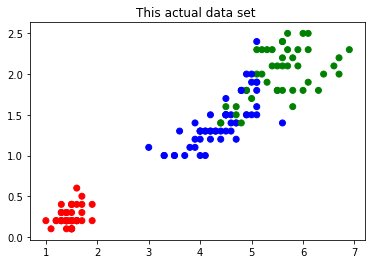

In [36]:
color2=np.array(['green','red','blue'])
plt.scatter(x=iris_df.petal_length, y = iris_df.petal_width, c= color2[clustering.labels_])
plt.title ("This actual data set ")

In [37]:
# Elbow technique to find number of KMeans
# K = 1 to 10, we calculate distortion, and then we plot the graph K and distortions

distortions = []

K = range(1,10)



In [59]:
from scipy.spatial.distance import cdist
import math

In [60]:
iris_df.head()
X = iris_df.loc[:,['petal_length','petal_width']]
X = np.array(X)


In [64]:
for k in K:
    kmeans_model = KMeans(n_clusters=k)
    kmeans_model.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeans_model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


In [65]:
distortions

[1.7069324035460887,
 0.58439250633151674,
 0.36925710319739752,
 0.29971489163499448,
 0.26557412642742578,
 0.23473054779040917,
 0.21193217210553209,
 0.19833851599654068,
 0.18676522201732065]

Text(0,0.5,'Distortions')

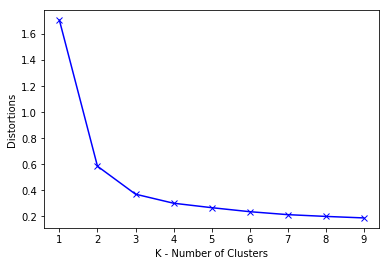

In [67]:
#plot distortion againts K value 
plt.plot(K, distortions, 'bx-')
plt.xlabel("K - Number of Clusters")
plt.ylabel("Distortions")



In [ ]:
# In the iris data set, elbow is clearing at K =3 , thus 3 clusters.